# **Time Series Analysis of Nairobi Night Time Lights 2013-2022 Using Google Earth Engine-Python API.**



**Topics**

1. Introduction.
2. Authentication.
3. Import Modules,Data and Plot An Interactive Map.
4. Time Series Plot.
5. Smoothen Radiance Curve.
6. References.


**1. Introduction**

Google Earth Engine is a online computation platform that has collosal amount of remotely collected geospatial datasets for scientific research. Nighttime lights can be used as a strong indicator for socio-economic growth especially for areas where there no mechanism to measure characteristics such as population or GDP due to political or other reasons. 

Google colab is an interactive notebook, online based machine learning platform with an amazing computation power and can save you a ton of money and time. Using colab we can access datasets from GEE and perform highly interactive modeling with huge impacts on data science with the ultimate goal of providing solutions to global challenges. 

Users require an API key to access data from Google's online repository, through an API servers requests are made. Using Python access key its easy to share scripts and plotting options are many and easy to move to web applications. However, we will have to make several calls to earth engine as there are no built in authentication. 


**2. Authentication**

In [73]:
# Python API to access Earth Engine.
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

**3. Import Modules, Data and Plot An Interactive Map.**

We have to import libraries containing functionalities we require through out the process and plot a simple interactive map containing overlayed annual nightlight data from 2013 to 2022 masked around greater Nairobi Metropolitan Area. 

To generate a time series data, we will have to calculate the median value for each year filtered from Google Earth Catalog of scientific dataset. We will use annual Visible Infrared Imaging Radiometer Suite (VIIRS - avg_rad band) Nighttime Day/Night Band 1000m resolution colected from the years 2014 to 2022. 

In [74]:
# Modules required 

import geemap                      # Interactive mapping with GEE data
import pandas as pd                # 
import matplotlib.pyplot as plt    # For drawing plots
import seaborn as sns              # Enhance plots
import numpy as np                 # Array data manipulation

In [75]:
# Image collection 

# Annual 2014 image collection of CCNL avg_rad band.
dataset2014 = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filterDate('2014-01-01', '2014-12-31').select('avg_rad').median()

# Annual 2016 image collection of CCNL avg_rad band.
dataset2016 = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filterDate('2016-01-01', '2016-12-31').select('avg_rad').median()

# Annual 2018 image collection of CCNL avg_rad band.
dataset2018 = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filterDate('2018-01-01', '2018-12-31').select('avg_rad').median()

# Annual 2020 image collection of CCNL avg_rad band.
dataset2020 = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filterDate('2020-01-01', '2020-12-31').select('avg_rad').median()

# Annual 2022 image collection of CCNL avg_rad band.
dataset2022 = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filterDate('2022-01-01', '2022-12-31').select('avg_rad').median()


In [76]:
# Mask images to Narobi and its environs.

# Nairobi Area ,coordinates of lower left corner and upper right corner(llon,llat,  ulon,ulat).
aoi = ee.Geometry.Rectangle( 36.53,-1.62,  37.40,-0.90)

# Images clipped to Nairobi
clipped2014 = dataset2014.clip(aoi)
clipped2016 = dataset2016.clip(aoi)
clipped2018 = dataset2018.clip(aoi)
clipped2020 = dataset2020.clip(aoi)
clipped2022 = dataset2022.clip(aoi)

In [77]:
# Interactive Map

# Initialise map parameters with coordinates of Nairobi as the center of map, 
lat =  -1.2844
lon =  36.8336

# Initialise map
map = geemap.Map(center=[lat,lon], zoom=9, height=300)

# Add basemap tiles
map.add_basemap('SATELLITE')
map.add_basemap('TERRAIN')

# Add clipped datasets to map with title and opacity
map.addLayer(clipped2014, {}, 'Nairobi Night Light 2014', opacity=0.85)
map.addLayer(clipped2016, {}, 'Nairobi Night Light 2016', opacity=0.85)
map.addLayer(clipped2018, {}, 'Nairobi Night Light 2018', opacity=0.85)
map.addLayer(clipped2020, {}, 'Nairobi Night Light 2020', opacity=0.85)
map.addLayer(clipped2022, {}, 'Nairobi Night Light 2022', opacity=0.85)

# Add layer control to enable toggle between multiple images.
map.addLayerControl()

# Call map to plot
map


Map(center=[-1.2844, 36.8336], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

**Time Series Plot** 

For better understanding of temporal analysis, a common phenomenom in  remote sensing, you would want to quantify reflectance or radiance over time using a line graph otherwise known as time series graph.

In [78]:
# Create a dataframe containing mean monthly radiance 

# Image collection for 2014 to 2022
images = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filterDate('2014-01-01', '2022-12-31')

# A function that calculates radiance for each image.   
def pixel_mean(image):

  # A function that applies a reducer(for this case mean()) to all images passed to it, 
  # scale is used to regulate number of pixels , use 50m due to small region of interest 
  mean_value = image.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi, scale=50).get('avg_rad')

  # Set reduced information(above) as property (we can refer to it as mean) and to image along with date, return this value  
  return image.set('date', image.date().format()).set('mean',mean_value)

# Map the above function to all images in batch1
reduced_imgs = images.map(pixel_mean)

# Reduce an image collection to a nested list.
nested_list = reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)

# Convert nested list into a dataframe
data = pd.DataFrame(nested_list.getInfo(), columns=['date','mean'])

# Print the dataframe, each observation represents a month from January 2014 to December 2022
data

,date,mean
0,2014-01-01T00:00:00,1.260950
1,2014-02-01T00:00:00,1.263016
2,2014-03-01T00:00:00,1.562068
3,2014-04-01T00:00:00,1.467449
4,2014-05-01T00:00:00,1.001016
...,...,...
102,2022-07-01T00:00:00,1.562136
103,2022-08-01T00:00:00,2.666409
104,2022-09-01T00:00:00,3.524409
105,2022-10-01T00:00:00,3.447262


In [79]:
# Convert string timestamp to native timestamp data type and set this datetime column as our index.

data['Date'] = pd.to_datetime(data['date'])
data = data.set_index('Date')

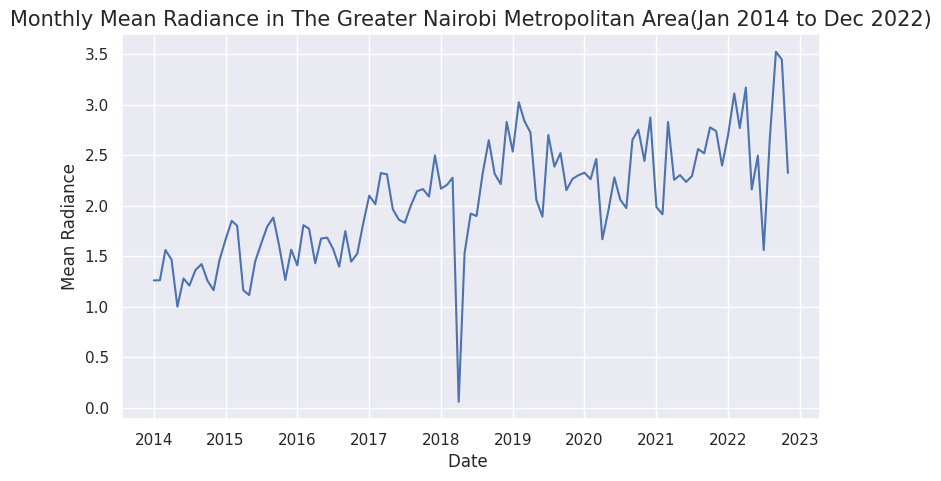

In [80]:
# Plot a time series line graph 


#   Set seaborn theme
sns.set_theme(style="darkgrid")

# Create a figure of size 9 by 5
fig, ax = plt.subplots(figsize=(9,5))

# Add line plot 
sns.lineplot(data, ax=ax, legend=False)

# Set axis labels and title
ax.set_ylabel('Mean Radiance',fontsize=12)
ax.set_xlabel('Date ',fontsize=12)
ax.set_title('Monthly Mean Radiance in The Greater Nairobi Metropolitan Area(Jan 2014 to Dec 2022)',fontsize=15)

plt.show()



**5. Smoothen Radiance Curve.**

In order to create a smooth plot, moving average method with window size of 12 months(1 year) is used to reduce noise. A running average / rolling mean requires a window size in which average values are to be calculated. A window is defined, average values generated, then its shifted by one data point and the process repeated til all data points are exhausted.


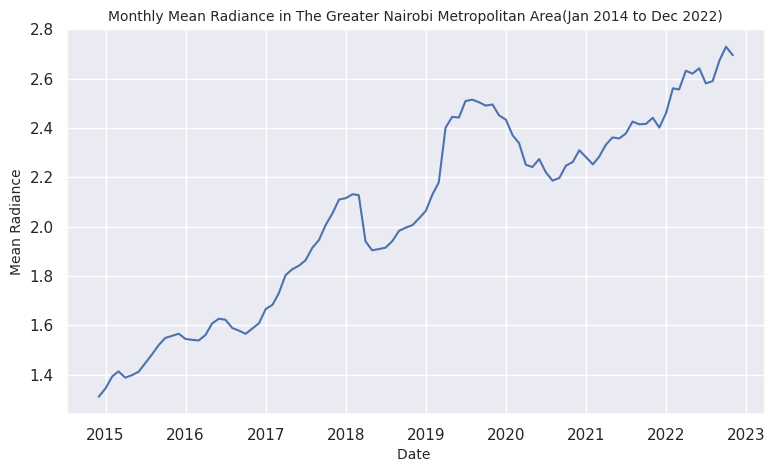

In [81]:
# Remove spikes from the radiance plot.


# Running average for a year 
avg = data['mean']
run_avg = avg.rolling(window=12).mean()

# Plot response
# Create a figure of size 9 by 5
fig, ax = plt.subplots(figsize=(9,5))

# Add smooth line plot 
sns.lineplot(run_avg, ax=ax, legend=False)

# Set axis labels and title
ax.set_ylabel('Mean Radiance',fontsize=10)
ax.set_xlabel('Date ',fontsize=10)
ax.set_title('Monthly Mean Radiance in The Greater Nairobi Metropolitan Area(Jan 2014 to Dec 2022)',fontsize=10)

# Call Plot 
plt.show()

**6. References**

1. Google Earth Engine - https://developers.google.com/earth-engine/